In [42]:
from langgraph.graph import StateGraph, START, END 
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

# Load environment variables
load_dotenv()
MODEL = "gpt-4.1-mini"
TEMPERATURE = 0

In [43]:
# define state

class BlogState(TypedDict):
    topic: str 
    outline: str
    content: str
    score: float

In [44]:
# define functions

def blog_outline(state: BlogState) -> BlogState:
    topic = state['topic']

    llm = ChatOpenAI(
            model=MODEL, 
            temperature=TEMPERATURE
            )
    
    prompt = f"Create a concise outline for a blog post about: {topic}"
    
    llm_response = llm.invoke(prompt).content

    state['outline'] = llm_response
    
    return state


def blog_content(state: BlogState) -> BlogState:
    outline = state['outline']

    llm = ChatOpenAI(
            model=MODEL, 
            temperature=TEMPERATURE
            )
    
    prompt = f"Create a 10-line concise blog based on the outline: {outline}"
    
    llm_response = llm.invoke(prompt).content

    state['content'] = llm_response
    
    return state


def evaluate_blog(state: BlogState) -> BlogState:
    topic = state['topic']
    content = state['content']

    llm = ChatOpenAI(
            model=MODEL, 
            temperature=TEMPERATURE
            )
    
    prompt = f"Evaluate the blog score (0-10) based on the title: {topic} and the following content \n {content}. Return only the score."
    
    llm_response = llm.invoke(prompt).content

    state['score'] = llm_response
    
    return state

In [45]:
# define graph

graph = StateGraph(BlogState)

# add notes
graph.add_node("blog_outline", blog_outline)
graph.add_node("blog_content", blog_content)
graph.add_node("evaluate_blog", evaluate_blog)

# add edges
graph.add_edge(START, "blog_outline")
graph.add_edge("blog_outline", "blog_content")
graph.add_edge("blog_content", "evaluate_blog")
graph.add_edge("evaluate_blog", END)

# compile graph
workflow = graph.compile()

# execute graph
topic = "Future of AI in Pakistan"
initial_state = {"topic": topic}

final_state = workflow.invoke(initial_state)

In [46]:
from pprint import pprint

print(final_state["outline"])
print(final_state["score"])

**Outline: Future of AI in Pakistan**

1. **Introduction**
   - Brief overview of AI globally
   - Importance of AI for developing economies like Pakistan

2. **Current State of AI in Pakistan**
   - Existing AI initiatives and startups
   - Government policies and support
   - Academic and research contributions

3. **Key Sectors Poised for AI Transformation**
   - Agriculture: precision farming and crop monitoring
   - Healthcare: diagnostics and telemedicine
   - Education: personalized learning and automation
   - Finance: fintech innovations and fraud detection

4. **Challenges to AI Adoption**
   - Infrastructure and digital divide
   - Skill gaps and education
   - Data privacy and ethical concerns
   - Regulatory environment

5. **Opportunities and Potential Impact**
   - Economic growth and job creation
   - Enhancing public services and governance
   - Positioning Pakistan as a regional AI hub

6. **Future Outlook and Recommendations**
   - Strengthening AI education and rese

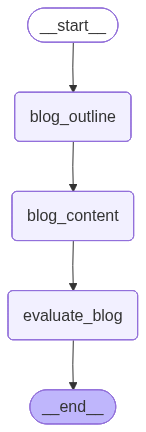

In [47]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())